In [1]:
!pip install pylift

  Created wheel for pylift: filename=pylift-0.1.5-py3-none-any.whl size=26034 sha256=b61ded9389a0e7a6e141b9fa16dc35336108b904d327086123e54f2a8a1234d3
  Stored in directory: c:\users\svetlana.medvedeva\appdata\local\pip\cache\wheels\e2\07\a6\9eb166844c9ecbf16ee34d08e32bbd86d2a5ce5c1b8625fb1b
Successfully built pylift


In [3]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
from pylift import TransformedOutcome
from pylift.generate_data import dgp

# Generate some data.
df = dgp(N=10000, discrete_outcome=True)


In [4]:
# Specify your dataframe, treatment column, and outcome column.
up = TransformedOutcome(df, col_treatment='Treatment', col_outcome='Outcome', stratify=df['Treatment'])

<AxesSubplot:xlabel='NIV', ylabel='Features'>

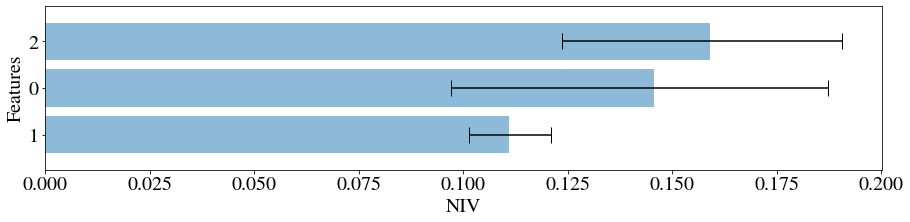

In [5]:
# This function randomly shuffles your training data set and calculates net information value.
up.NIV()

<AxesSubplot:title={'center':'NWOE by bin for 0'}, xlabel='Bin Interval'>

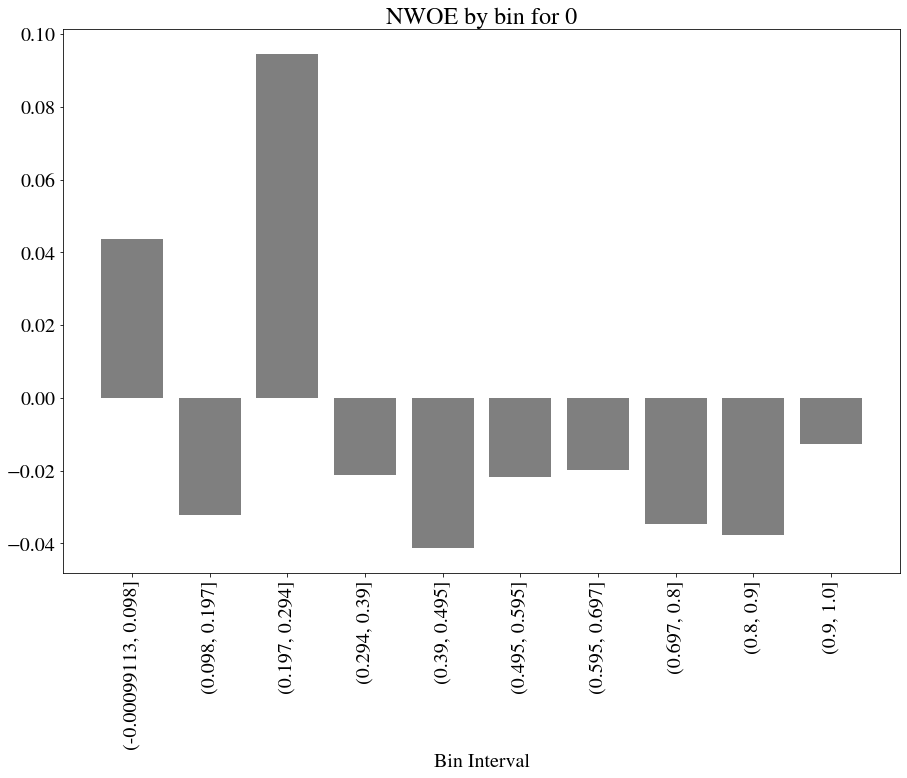

In [6]:
up.NWOE(feats_to_use=[0])

In [7]:
up.NIV_dict

{0: 0.1456404183094997, 1: 0.11088879304535293, 2: 0.1589709398375939}

In [8]:
up.randomized_search(n_iter=20, n_jobs=10, random_state=1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   21.2s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      

In [10]:
up.fit(**up.rand_search_.best_params_)

C:\Users\svetlana.medvedeva\Anaconda3\lib\site-packages\pylift\eval.py:344: RuntimeWarning: invalid value encountered in double_scalars
  - (sure_things[0])/(persuadables[0] + sure_things[0] + lost_causes[0])
C:\Users\svetlana.medvedeva\Anaconda3\lib\site-packages\pylift\eval.py:343: RuntimeWarning: divide by zero encountered in double_scalars
  kink_y = (persuadables[1] + sure_things[1])/(persuadables[1] + sure_things[1] + lost_causes[1]) \


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

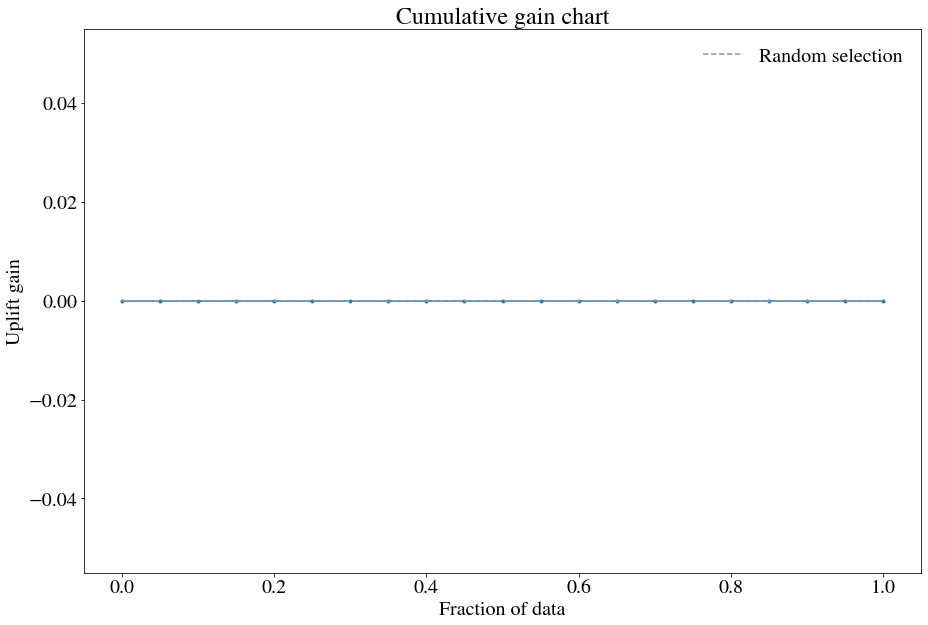

In [11]:
up.plot()

In [14]:
up.fit(productionize=True)

In [16]:
up.model_final

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 0, 'Adjusted Qini score')

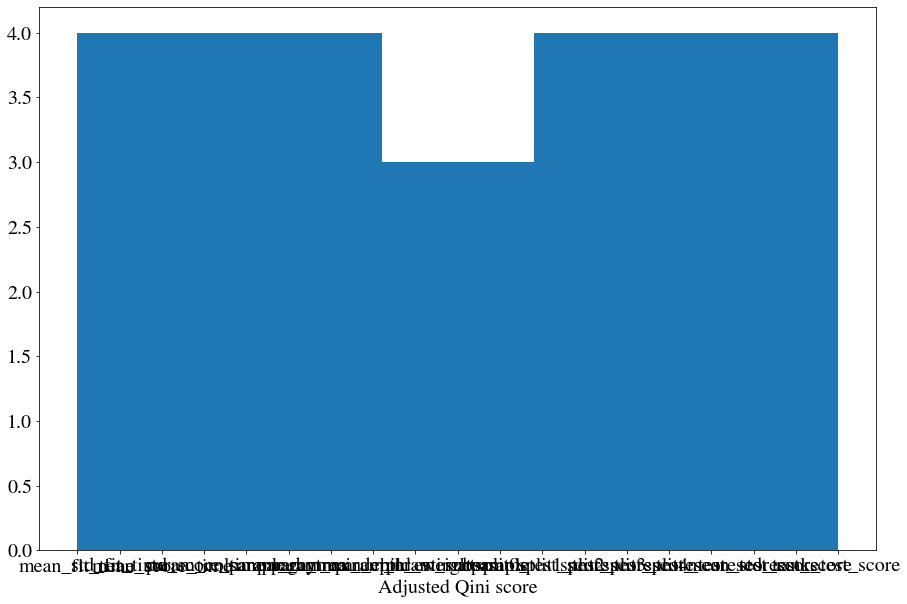

In [22]:
results = up.rand_search_.cv_results_
plt.figure(figsize=(15,10))
plt.hist(results, bins=5)
plt.xlabel('Adjusted Qini score')

In [23]:
ranges = list(range(1,500,10))
scores = []

for val in ranges:
    up.fit(n_estimators=val, nthread=4)
    scores.append(up.test_results_.q1_aqini)

C:\Users\svetlana.medvedeva\Anaconda3\lib\site-packages\pylift\eval.py:344: RuntimeWarning: invalid value encountered in double_scalars
  - (sure_things[0])/(persuadables[0] + sure_things[0] + lost_causes[0])
C:\Users\svetlana.medvedeva\Anaconda3\lib\site-packages\pylift\eval.py:343: RuntimeWarning: divide by zero encountered in double_scalars
  kink_y = (persuadables[1] + sure_things[1])/(persuadables[1] + sure_things[1] + lost_causes[1]) \


In [24]:
scores

[9.899029506922262e-07,
 -7.861077397527272e-19,
 -5.198804049177261e-19,
 9.89902950692995e-07,
 9.899029506940282e-07,
 9.899029506905662e-07,
 9.899029506914956e-07,
 2.9697088520748727e-06,
 2.9697088520760573e-06,
 5.93941770414661e-06,
 5.9394177041477514e-06,
 5.939417704142917e-06,
 9.899029506938817e-07,
 2.9697088520740574e-06,
 9.899029506934612e-07,
 1.6572000478777605e-18,
 1.2162339414262542e-18,
 1.1390540329224507e-18,
 5.939417704143094e-06,
 9.89902950691461e-07,
 2.9697088520737186e-06,
 -1.1438235978220715e-18,
 2.969708852072396e-06,
 2.9697088520743945e-06,
 9.899029506961312e-07,
 9.899029506922484e-07,
 9.899029506927435e-07,
 9.899029506956647e-07,
 -1.0571045995031907e-18,
 9.899029506892133e-07,
 9.899029506915007e-07,
 9.899029506872935e-07,
 2.969708852069748e-06,
 2.9697088520717535e-06,
 9.899029506916765e-07,
 9.899029506918569e-07,
 -1.7122666318023255e-18,
 1.5132464207040457e-19,
 -1.6346532182713073e-19,
 -2.1848851726402306e-18,
 -5.970603134215287e

In [27]:
df = pd.DataFrame(scores)
df

,0
0,9.899030e-07
1,-7.861077e-19
2,-5.198804e-19
3,9.899030e-07
4,9.899030e-07
5,9.899030e-07
6,9.899030e-07
7,2.969709e-06
8,2.969709e-06
9,5.939418e-06


In [28]:
df.to_csv("file.csv", encoding="utf-8") 